# Traces

- use as the base docker compose
    - https://gitlab.eurecom.fr/oai/cn5g/oai-cn5g-fed/-/blob/2023.w10/docker-compose/docker-compose-basic-nrf.yaml

- add the `oai-gnb`and `oai-nr-ue` services from
    - https://gitlab.eurecom.fr/oai/openairinterface5g/-/blob/2023.w09/ci-scripts/yaml_files/5g_rfsimulator/docker-compose.yaml

- edit the `oai-gnb` service
    - container_name: aoi-gnb
    - TAC: 0xa000
    - MNC: '95'
    - AMF_IP_ADDRESS: 192.168.70.132
    - GNB_NGA_IP_ADDRESS: 192.168.70.140
    - GNB_NGU_IP_ADDRESS: 192.168.70.140
    - ipv4_address: 192.168.70.140

- edit the `oai-nr-ue` service
    - container_name: oai-nr-ue
    - RFSIMULATOR: 192.168.70.140
    - FULL_IMSI: '208950000000031'
    - FULL_KEY: '0C0A34601D4F07677303652C0462535B'
    - OPC: '63bfa50ee6523365ff14c1f45f88737d'
    - ipv4_address: 192.168.70.150

- edit the `oai-amf` service
    - EXTERNAL_UDM=yes
        - to capture the exchange between the AMF and the UDM

- add folders
    - conf
    - database
    - heathscripts

- https://gitlab.eurecom.fr/oai/openairinterface5g/-/blob/2023.w09/ci-scripts/yaml_files/5g_rfsimulator/README.md
- https://gitlab.eurecom.fr/oai/cn5g/oai-cn5g-fed/-/blob/2023.w10/docs/DEBUG_5G_CORE.md
- https://gitlab.eurecom.fr/oai/cn5g/oai-cn5g-fed/-/blob/2023.w10/docs/DEPLOY_SA5G_BASIC_DEPLOYMENT.md
- https://gitlab.eurecom.fr/oai/cn5g/oai-cn5g-fed/-/tree/2023.w10/docs/results/dsTest/basic-nrf

#### Terminal 1
```bash
docker compose up -d mysql oai-udr oai-udm oai-ausf oai-nrf oai-amf oai-smf oai-spgwu oai-ext-dn
docker ps -a
docker compose up -d oai-gnb
docker ps -a
docker compose up -d oai-nr-ue
```

#### Terminal 2
```bash
sudo tshark -i demo-oai \
     -f "sctp or port 80 or port 8080 or port 8805 or icmp or port 3306" \
     -w /tmp/5gcn-basic-deployment-nrf.pcap
```

#### Diagram
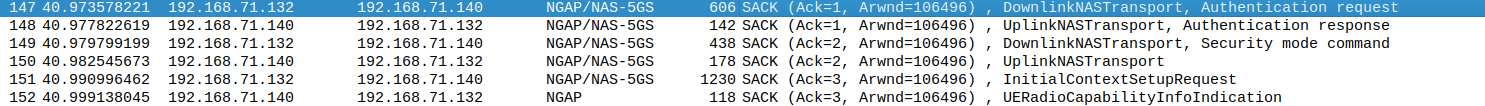

#### Wireshark
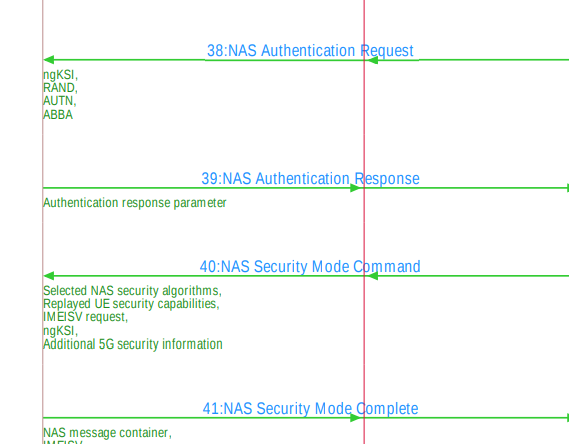

### Capture the exchange between the gNB and the AMF

#### Diagram
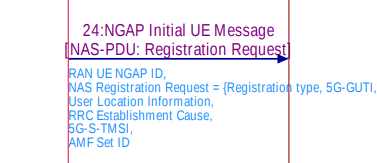

#### Wireshark
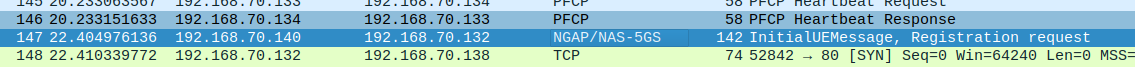


### Capture the exchange between the AMF and the AUSF

#### Diagram
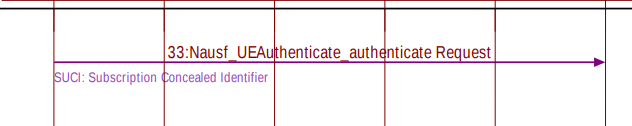

#### Wireshark
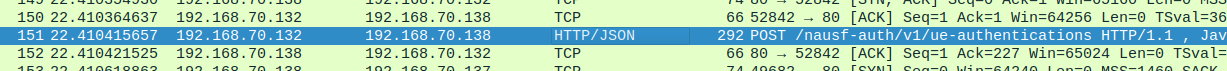

#### Diagram
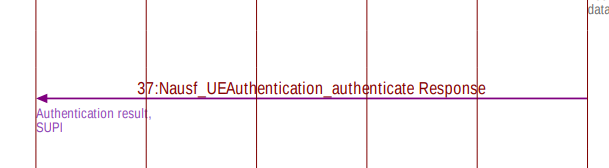

#### Wireshark
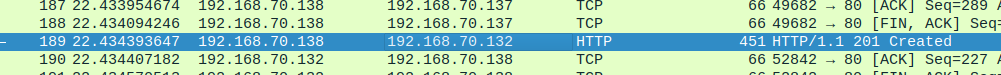

### Capture the exchange between the AMF and the UDM
(ip.src == 192.168.70.132 and ip.dst == 192.168.70.137) or (ip.src == 192.168.70.137 and ip.dst == 192.168.70.132)


#### Diagram
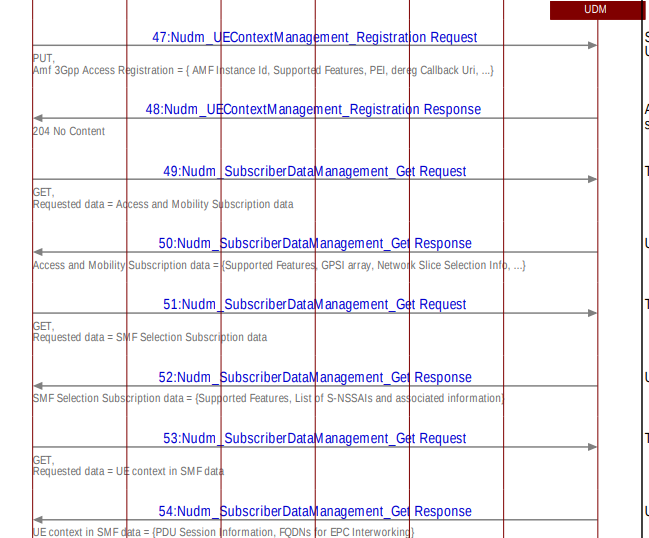

#### Wireshark
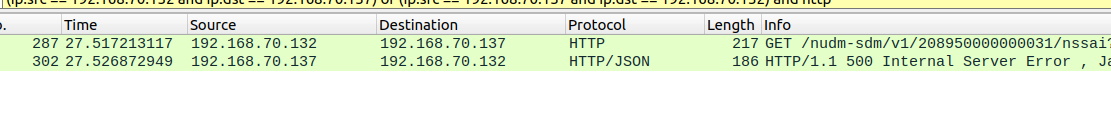

### Capture the exchange between the SMF and the UPF
```
(ip.src == 192.168.70.133 and ip.dst == 192.168.70.134) or (ip.src == 192.168.70.134 and ip.dst == 192.168.70.133)
```

#### Diagram
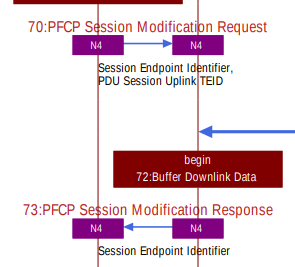

#### Wireshark
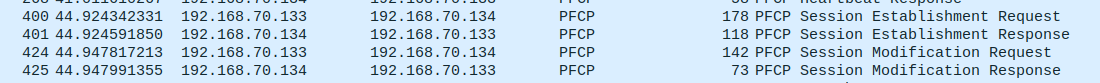

### Capture the exchange between the AMF and the SMF
```
(ip.src == 192.168.70.132 and ip.dst == 192.168.70.133) or (ip.src == 192.168.70.133 and ip.dst == 192.168.70.132) and http
```

#### Diagram 1
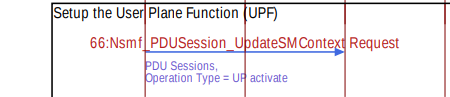

#### Diagram 2
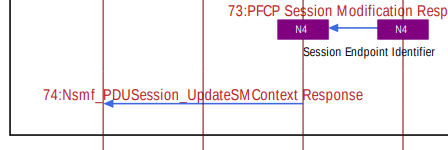

#### Wireshark
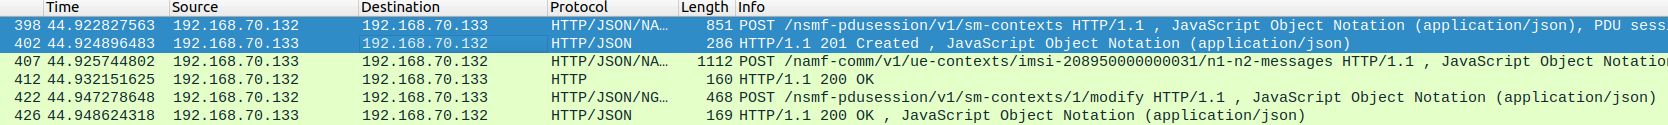

### Capture the final exchange
```
(ip.src == 192.168.70.132 and ip.dst == 192.168.70.140)
```

#### Diagram
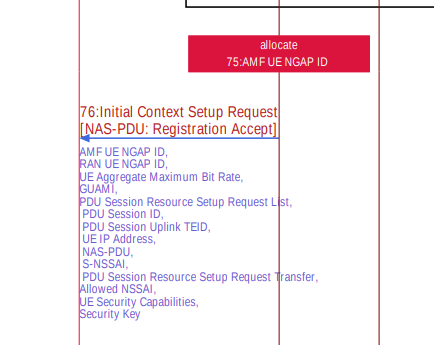

#### Wireshark
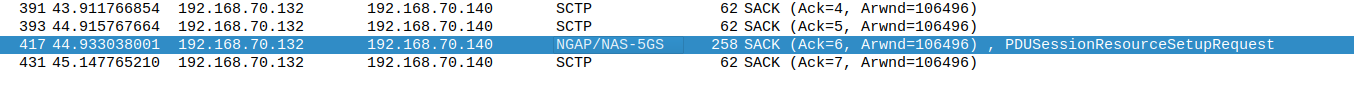